# CSCI 0451: 'Optimal' Decision Making


### Introduction

This post explores the concept of 'optimal' decision making in the context of computer science. We will discuss the concept of 'optimal' and how it can affect the decision-making process. We will also explore some of the challenges and limitations of 'optimal' decision making in computer science.

I use a logistic regression model to predict whether a loan will be paid off or not. I then calculate a threshold for the model to maximize profit. I then use this threshold to make decisions on whether to lend money to a borrower or not.

To spoil the ending, with money-minded decision making, we were able to profit almost $3000 per loan. However, this doesn't take into account any of ethical considerations that come with not lending money. This is a very important consideration to make when making decisions in the real world, as many decisions are not as simple as maximizing profit.

Let's begin by grabbing the data:


In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv"
df_train = pd.read_csv(url)

### Exploring the Data

The first step is to look at the data: how it looks, what it contains, and initial observations. Lets take a look.

In [14]:
# data exploration
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,43200,RENT,NaN,VENTURE,B,1200,9.91,0,0.03,N,4
1,27,98000,RENT,3.0,EDUCATION,C,11750,13.47,0,0.12,Y,6
2,22,36996,RENT,5.0,EDUCATION,A,10000,7.51,0,0.27,N,4
3,24,26000,RENT,2.0,MEDICAL,C,1325,12.87,1,0.05,N,4
4,29,53004,MORTGAGE,2.0,HOMEIMPROVEMENT,A,15000,9.63,0,0.28,N,10


In [16]:
df_train.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,26064.000000,2.606400e+04,25351.000000,26064.000000,23566.000000,26064.000000,26064.000000,26064.000000
mean,27.734385,6.597481e+04,4.783559,9569.468424,11.009372,0.217580,0.169970,5.794467
std,6.362612,6.330551e+04,4.166275,6297.660303,3.246762,0.412608,0.106491,4.055432
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.887250e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12000.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


First off, I'm very interested in the maximum age being 144. For the sake of my waning amusement, lets take a closer look at them.

In [4]:
print("Entry with maximum person_age:\n", df_train.loc[df_train['person_age'].idxmax()])

Entry with maximum person_age:
 person_age                        144
person_income                  250000
person_home_ownership            RENT
person_emp_length                 4.0
loan_intent                   VENTURE
loan_grade                          C
loan_amnt                        4800
loan_int_rate                   13.57
loan_status                         0
loan_percent_income              0.02
cb_person_default_on_file           N
cb_person_cred_hist_length          3
Name: 1561, dtype: object


Fascinating! Moving on, let's make some visualizations to better understand the data.

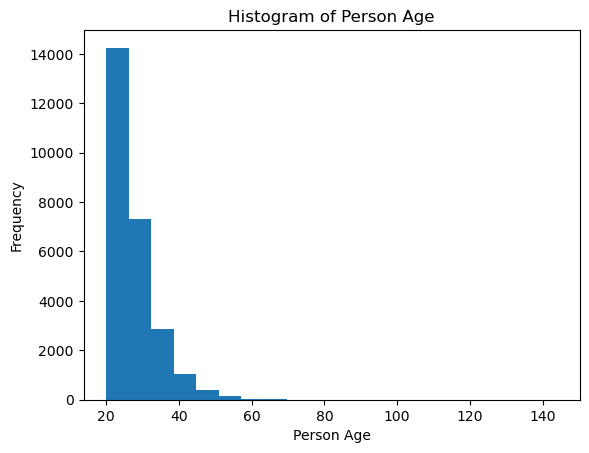

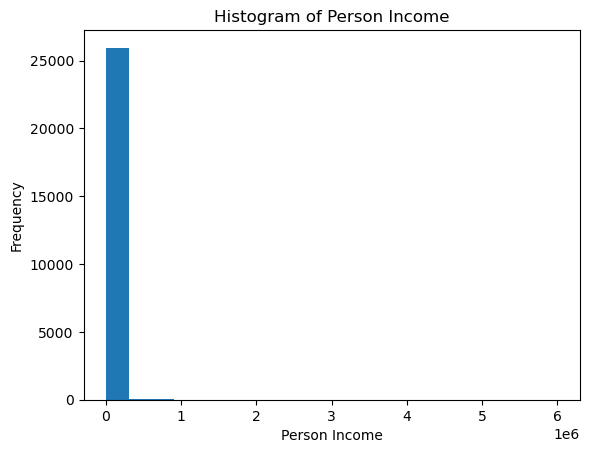

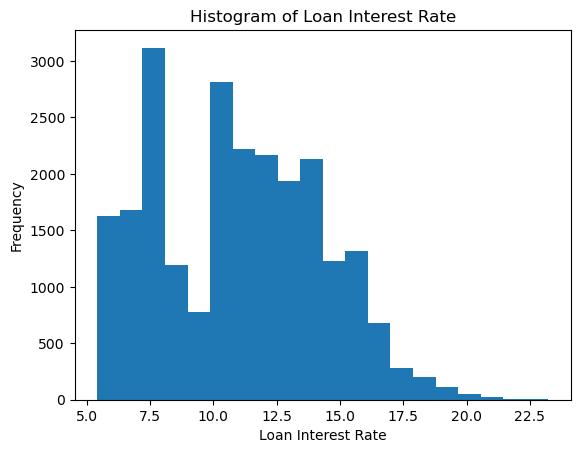

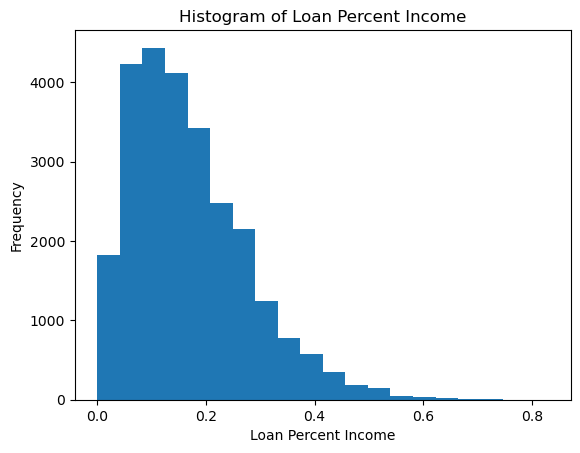

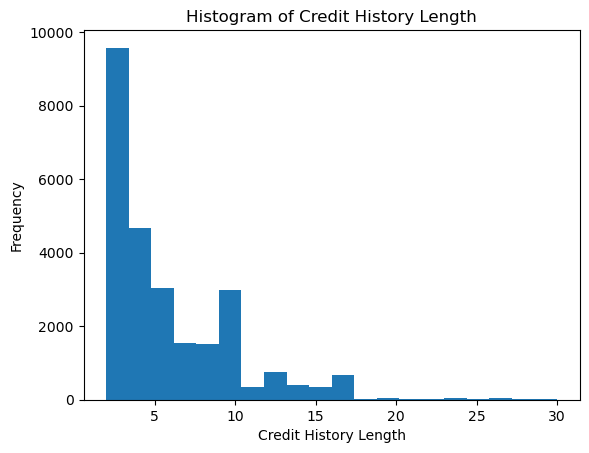

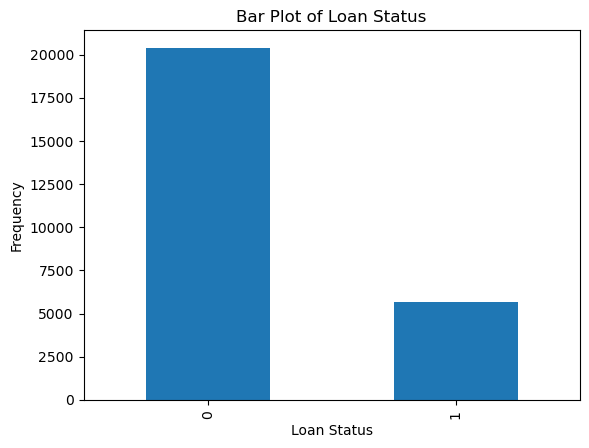

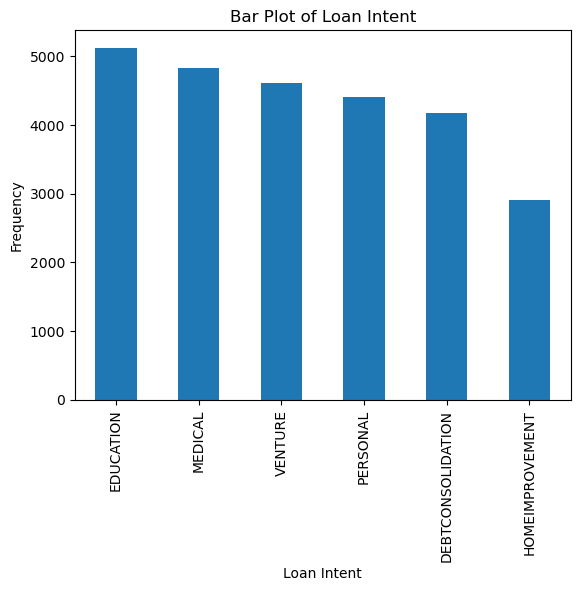

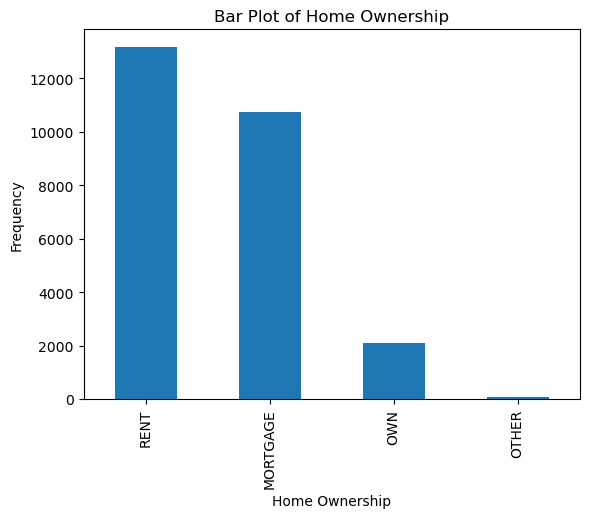

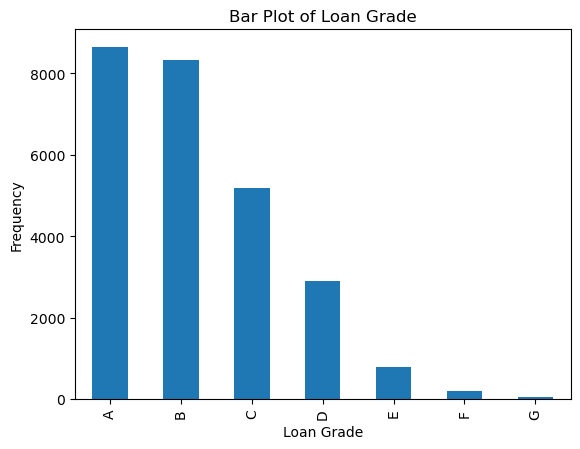

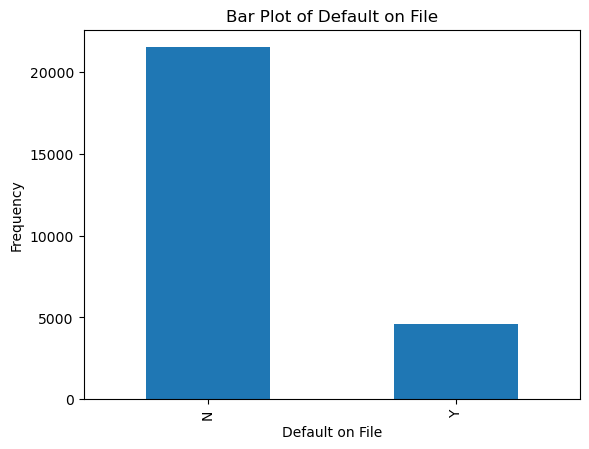

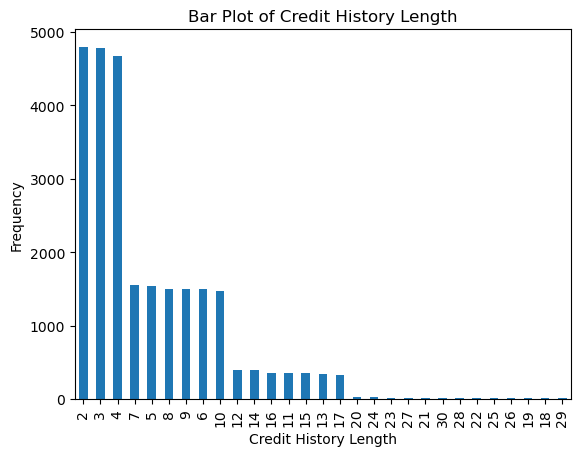

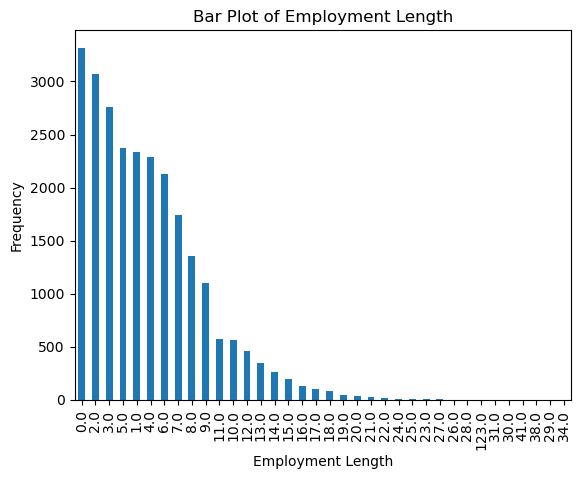

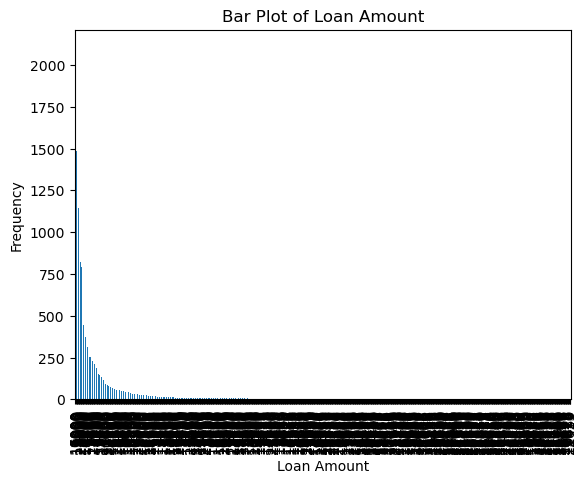

In [6]:
# let's make some visualizations to better understand the data
import matplotlib.pyplot as plt

# histogram of person_age
plt.hist(df_train['person_age'], bins = 20)
plt.xlabel('Person Age')
plt.ylabel('Frequency')
plt.title('Histogram of Person Age')
plt.show()

# histogram of person_income
plt.hist(df_train['person_income'], bins = 20)
plt.xlabel('Person Income')
plt.ylabel('Frequency')
plt.title('Histogram of Person Income')
plt.show()

# histogram of loan_int_rate
plt.hist(df_train['loan_int_rate'], bins = 20)
plt.xlabel('Loan Interest Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Interest Rate')
plt.show()

# histogram of loan_percent_income
plt.hist(df_train['loan_percent_income'], bins = 20)
plt.xlabel('Loan Percent Income')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Percent Income')
plt.show()

# histogram of cb_person_cred_hist_length
plt.hist(df_train['cb_person_cred_hist_length'], bins = 20)
plt.xlabel('Credit History Length')
plt.ylabel('Frequency')
plt.title('Histogram of Credit History Length')
plt.show()

# bar plot of loan_status
df_train['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.title('Bar Plot of Loan Status')
plt.show()

# bar plot of loan_intent
df_train['loan_intent'].value_counts().plot(kind='bar')
plt.xlabel('Loan Intent')
plt.ylabel('Frequency')
plt.title('Bar Plot of Loan Intent')
plt.show()

# bar plot of person_home_ownership
df_train['person_home_ownership'].value_counts().plot(kind='bar')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.title('Bar Plot of Home Ownership')
plt.show()

# bar plot of loan_grade
df_train['loan_grade'].value_counts().plot(kind='bar')
plt.xlabel('Loan Grade')
plt.ylabel('Frequency')
plt.title('Bar Plot of Loan Grade')
plt.show()

# bar plot of cb_person_default_on_file
df_train['cb_person_default_on_file'].value_counts().plot(kind='bar')
plt.xlabel('Default on File')
plt.ylabel('Frequency')
plt.title('Bar Plot of Default on File')
plt.show()

# bar plot of cb_person_cred_hist_length
df_train['cb_person_cred_hist_length'].value_counts().plot(kind='bar')
plt.xlabel('Credit History Length')
plt.ylabel('Frequency')
plt.title('Bar Plot of Credit History Length')
plt.show()

# bar plot of person_emp_length
df_train['person_emp_length'].value_counts().plot(kind='bar')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.title('Bar Plot of Employment Length')
plt.show()

# bar plot of loan_amnt
df_train['loan_amnt'].value_counts().plot(kind='bar')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Bar Plot of Loan Amount')
plt.show()


It seems that a lot of the data is concentrated around the mean. This is a good sign, as it means that the data is not too spread out. This will make it easier to analyze and make decisions based on general trends.

Since we are interested in determining the 'optimal' decision, we will need to define what 'optimal' means in this context. In the most simplified terms of loans, we want to minimize the risk of default while maximizing the return on investment. This is a classic trade-off problem in computer science, and we will need to balance these two objectives to make the 'optimal' decision. However, it is important to note that this is a gross generalization and not necessarily indicative of individual cases.


### Building a Model

To build a model, we will need to define the features and labels of the data. The features are the attributes of the data that we will use to make predictions, excluding loan_garde, while the labels are the outcomes that we are trying to predict. In this case, the features are the attributes of the loans, such as the loan amount, interest rate, and term length, while the labels are the outcomes of the loans, such as whether the loan was repaid or defaulted.

We will use a Logistic Regression model to do this. Lets try to train the model on all of the attributes excluding loan_grade and loan_status and see how well it performs.

In [21]:
# We will use a Logistic Regression model to do this. Lets try to train the model on all of the attributes excluding loan_grade and loan_status and see how well it performs.

from sklearn.linear_model import LogisticRegression

X_train = df_train

# drop loan_grade
X_train = X_train.drop(['loan_grade'], axis = 1)

# drop loan_status
X_train = X_train.drop(['loan_status'], axis = 1)

X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,43200,RENT,NaN,VENTURE,1200,9.91,0.03,N,4
1,27,98000,RENT,3.0,EDUCATION,11750,13.47,0.12,Y,6
2,22,36996,RENT,5.0,EDUCATION,10000,7.51,0.27,N,4
3,24,26000,RENT,2.0,MEDICAL,1325,12.87,0.05,N,4
4,29,53004,MORTGAGE,2.0,HOMEIMPROVEMENT,15000,9.63,0.28,N,10


In [22]:
# one-hot encode the categorical variables
X_train = pd.get_dummies(X_train)

X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,25,43200,NaN,1200,9.91,0.03,4,False,False,False,True,False,False,False,False,False,True,True,False
1,27,98000,3.0,11750,13.47,0.12,6,False,False,False,True,False,True,False,False,False,False,False,True
2,22,36996,5.0,10000,7.51,0.27,4,False,False,False,True,False,True,False,False,False,False,True,False
3,24,26000,2.0,1325,12.87,0.05,4,False,False,False,True,False,False,False,True,False,False,True,False
4,29,53004,2.0,15000,9.63,0.28,10,True,False,False,False,False,False,True,False,False,False,True,False


In [26]:
# encode true/false columns as 1/0
X_train['person_home_ownership_MORTGAGE'] = X_train['person_home_ownership_MORTGAGE'].astype(int)
X_train['person_home_ownership_OTHER'] = X_train['person_home_ownership_OTHER'].astype(int)
X_train['person_home_ownership_OWN'] = X_train['person_home_ownership_OWN'].astype(int)
X_train['person_home_ownership_RENT'] = X_train['person_home_ownership_RENT'].astype(int)
X_train['loan_intent_DEBTCONSOLIDATION'] = X_train['loan_intent_DEBTCONSOLIDATION'].astype(int)
X_train['loan_intent_EDUCATION'] = X_train['loan_intent_EDUCATION'].astype(int)
X_train['loan_intent_HOMEIMPROVEMENT'] = X_train['loan_intent_HOMEIMPROVEMENT'].astype(int)
X_train['loan_intent_MEDICAL'] = X_train['loan_intent_MEDICAL'].astype(int)
X_train['loan_intent_PERSONAL'] = X_train['loan_intent_PERSONAL'].astype(int)
X_train['loan_intent_VENTURE'] = X_train['loan_intent_VENTURE'].astype(int)
X_train['cb_person_default_on_file_N'] = X_train['cb_person_default_on_file_N'].astype(int)
X_train['cb_person_default_on_file_Y'] = X_train['cb_person_default_on_file_Y'].astype(int)

# drop NAs
X_train = X_train.dropna()

X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,27,98000,3.0,11750,13.47,0.12,6,0,0,0,1,0,1,0,0,0,0,0,1
2,22,36996,5.0,10000,7.51,0.27,4,0,0,0,1,0,1,0,0,0,0,1,0
3,24,26000,2.0,1325,12.87,0.05,4,0,0,0,1,0,0,0,1,0,0,1,0
4,29,53004,2.0,15000,9.63,0.28,10,1,0,0,0,0,0,1,0,0,0,1,0
6,21,21700,2.0,5500,14.91,0.25,2,0,0,0,1,0,0,1,0,0,0,1,0


In [29]:
# train the model
# Choose your features, estimate new ones if needed, and fit a score-based machine learning model to the data. My suggestion is LogisticRegression. Once you have fit a logistic regression model, the weight vector is stored as the attribute model.coef_.
Y_train = df_train['loan_status']
Y_train = Y_train[X_train.index]

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, Y_train)

# get the weights
weights = model.coef_
weights = weights[0]
weights

array([-6.36230941e-08, -4.05736686e-05, -2.49216289e-08,  1.06558109e-04,
        9.49857325e-08,  2.54996456e-09, -1.22515188e-08, -6.57168949e-09,
        5.82453376e-11, -3.93934560e-09,  8.07258494e-09,  2.68000657e-09,
       -3.01882534e-09,  1.83914839e-09,  1.33270518e-09, -1.41426169e-09,
       -3.79897794e-09, -9.65224646e-09,  7.27204165e-09])

The weights tell us how much each feature contributes to the prediction. The larger the weight, the more important the feature is in determining the outcome. We can use these weights to make predictions on new data and determine the 'optimal' decision.

In [30]:
# test the model with cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, Y_train, cv = 5)


array([0.80379747, 0.81209079, 0.82558393, 0.80571928, 0.80921196])

The model seems to be performing well, with cross validation scores averaging to about 0.81. This is a good sign, but we need to now find a threshold to determine whether a loan should be approved or not. This is where the concept of 'optimal' decision making comes into play. There are two assumptions we should make to determine whether a loan should be approved or not:

The first is that the loan is repaid in full, and is represented by $loan_amnt*(1 + 0.25*loan_int_rate)**10 - loan_amnt$. This assumes that the loan is repaid in full after 10 years, and that the lender is able to recover 25% of the loan amount as interest after paying employees and other expenses.

The second is that the loan is defaulted on, and is represented by $loan_amnt*(1 + 0.25*loan_int_rate)**3 - 1.7*loan_amnt$. This assumes that the loan is defaulted on after 3 years, and that the lender is able to recover 30% of the loan amount.

We can use these two assumptions to determine the threshold for the 'optimal' decision. If the predicted outcome is greater than the threshold, then the loan should be approved, otherwise it should be rejected.

In [97]:
import numpy as np

# create functions to calculate profit and loss for an entry in the dataset

def profitORloss(row):
    # access loan status from Y_train
    loan_status = Y_train.loc[row.name]
    # if loan_status is 0, calculate profit, else calculate loss
    if loan_status == 0:
        return row['loan_amnt']*(1 + .25*row['loan_int_rate']*0.01)**10 - row['loan_amnt']
    else:
        return -(row['loan_amnt']*(1 + .25*row['loan_int_rate']*0.01)*3 - 1.7*row['loan_amnt'])



# calculate profit or loss for each entry in the dataset and add it to the new column 'profit_or_loss'
X_train['profit_or_loss'] = X_train.apply(profitORloss, axis = 1)

X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,profit_or_loss
1,27,98000,3.0,11750,13.47,0.12,6,0,0,0,1,0,1,0,0,0,0,0,1,4613.567568
2,22,36996,5.0,10000,7.51,0.27,4,0,0,0,1,0,1,0,0,0,0,1,0,2044.334031
3,24,26000,2.0,1325,12.87,0.05,4,0,0,0,1,0,0,0,1,0,0,1,0,-1850.395625
4,29,53004,2.0,15000,9.63,0.28,10,1,0,0,0,0,0,1,0,0,0,1,0,4028.690420
6,21,21700,2.0,5500,14.91,0.25,2,0,0,0,1,0,0,1,0,0,0,1,0,-7765.037500


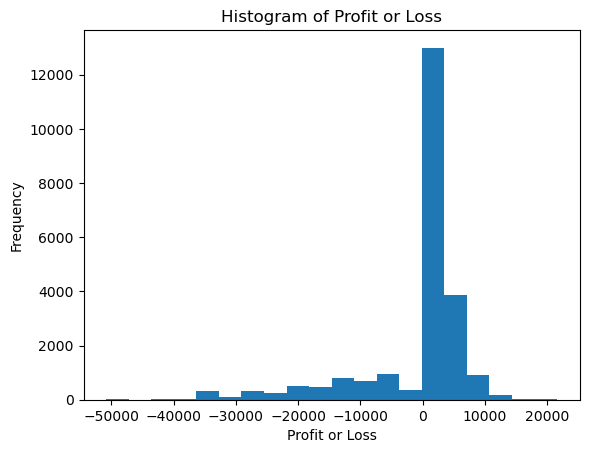

-24572766.55886856

In [134]:
# graphic of profit or loss for the entire dataset
plt.hist(X_train['profit_or_loss'], bins = 20)
plt.xlabel('Profit or Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Profit or Loss')
plt.show()

# calculate the total profit or loss for the entire dataset
total_profit_or_loss = X_train['profit_or_loss'].sum()
print("Total Profit or Loss: ", total_profit_or_loss)


Now we can see the profit (or lack thereof) of each loan. Based on these assumptions, we can determine the threshold $t$ for the 'optimal' decision, where if the profit is greater than $t$, then the loan should be approved, otherwise it should be rejected. Now, lets graph the profit of each loan against different thresholds to determine the 'optimal' decision.

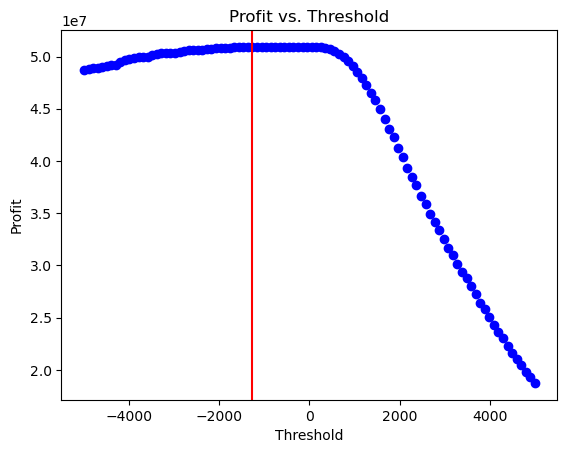

Threshold at maximum profit:  -1262.6262626262628
Maximum profit:  50918882.99425644


In [105]:
# Now we can see the profit (or lack thereof) of each loan. Based on these assumptions, we can determine the threshold $t$ for the 'optimal' decision, where if the profit is greater than $t$, then the loan should be approved, otherwise it should be rejected. Now, lets graph the profit of each loan against different thresholds to determine the 'optimal' decision.

# find maximum profit
max_profit = 0

for t in np.linspace(-5000, 5000, 100):
    profit = X_train['profit_or_loss']
    profit = profit[profit > t]
    profit = profit.sum()
    plt.scatter(t, profit, color = 'blue')
    if profit > max_profit:
        max_profit = profit
        max_t = t
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.title('Profit vs. Threshold')
# plot the threshold at maximum profit
plt.axvline(x = max_t, color = 'red')
plt.show()

print("Threshold at maximum profit: ", max_t)
print("Maximum profit: ", max_profit)

In [106]:
# add a new column 'decision' to the dataset
X_train['decision'] = X_train['profit_or_loss'] > max_t

X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,profit_or_loss,decision
1,27,98000,3.0,11750,13.47,0.12,6,0,0,0,...,0,1,0,0,0,0,0,1,4613.567568,True
2,22,36996,5.0,10000,7.51,0.27,4,0,0,0,...,0,1,0,0,0,0,1,0,2044.334031,True
3,24,26000,2.0,1325,12.87,0.05,4,0,0,0,...,0,0,0,1,0,0,1,0,-1850.395625,False
4,29,53004,2.0,15000,9.63,0.28,10,1,0,0,...,0,0,1,0,0,0,1,0,4028.690420,True
6,21,21700,2.0,5500,14.91,0.25,2,0,0,0,...,0,0,1,0,0,0,1,0,-7765.037500,False


With this threshold, we can now determine the 'optimal' decision for each loan. If the profit is greater than the threshold, then the loan should be approved, otherwise it should be rejected. Using that decision, we can determine the overall profit of the loans and evaluate the performance of the model.

In [136]:
# With this threshold, we can now determine the 'optimal' decision for each loan. If the profit is greater than the threshold, then the loan should be approved, otherwise it should be rejected. Using that decision, we can determine the overall profit of the loans and evaluate the performance of the model.

# calculate the overall profit of the loans
overall_profit = X_train['profit_or_loss'][X_train['decision']].sum()
print("Overall Profit: ", overall_profit)

# calculate average profit per accepted loan
average_profit = overall_profit/X_train['decision'].sum()
print("Average Profit per Accepted Loan: ", average_profit)


Overall Profit:  50918882.99425644
Average Profit per Accepted Loan:  2831.8159720959034


### Evaluating the Money Making Model

Now, lets evaluate the model on the test set to see how well it performs. We will use the threshold that we determined earlier to make predictions on the test set and evaluate the performance of the model.

In [121]:
# test model on test data
# load test data
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/test.csv"
df_test = pd.read_csv(url)
# drop NAs
df_test = df_test.dropna()
X_test, Y_test = df_test.drop(['loan_status'], axis = 1), df_test['loan_status']

# drop loan_grade
X_test = X_test.drop(['loan_grade'], axis = 1)

# one-hot encode the categorical variables
X_test = pd.get_dummies(X_test)

# encode true/false columns as 1/0
X_test['person_home_ownership_MORTGAGE'] = X_test['person_home_ownership_MORTGAGE'].astype(int)
X_test['person_home_ownership_OTHER'] = X_test['person_home_ownership_OTHER'].astype(int)
X_test['person_home_ownership_OWN'] = X_test['person_home_ownership_OWN'].astype(int)
X_test['person_home_ownership_RENT'] = X_test['person_home_ownership_RENT'].astype(int)
X_test['loan_intent_DEBTCONSOLIDATION'] = X_test['loan_intent_DEBTCONSOLIDATION'].astype(int)
X_test['loan_intent_EDUCATION'] = X_test['loan_intent_EDUCATION'].astype(int)
X_test['loan_intent_HOMEIMPROVEMENT'] = X_test['loan_intent_HOMEIMPROVEMENT'].astype(int)
X_test['loan_intent_MEDICAL'] = X_test['loan_intent_MEDICAL'].astype(int)
X_test['loan_intent_PERSONAL'] = X_test['loan_intent_PERSONAL'].astype(int)
X_test['loan_intent_VENTURE'] = X_test['loan_intent_VENTURE'].astype(int)
X_test['cb_person_default_on_file_N'] = X_test['cb_person_default_on_file_N'].astype(int)
X_test['cb_person_default_on_file_Y'] = X_test['cb_person_default_on_file_Y'].astype(int)



# predict the loan status
Y_pred = model.predict(X_test)

# calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)
print("Accuracy of model: ", accuracy_score(Y_test, Y_pred))

# ...

# calculate profit or loss for each entry in the dataset and add it to the new column 'profit_or_loss'
def profitORloss2(row, loan_status):
    if loan_status == 0:
        return row['loan_amnt']*(1 + .25*row['loan_int_rate']*0.01)**10 - row['loan_amnt']
    else:
        return -(row['loan_amnt']*(1 + .25*row['loan_int_rate']*0.01)*3 - 1.7*row['loan_amnt'])

# Reset the index of X_test
X_test.reset_index(drop=True, inplace=True)
# Reset the index of Y_test
Y_test.reset_index(drop=True, inplace=True)

X_test['profit_or_loss_predicted'] = X_test.apply(lambda row: profitORloss2(row, Y_pred[row.name]), axis=1)

# add a new column 'decision' to the dataset
X_test['decision_from_predicted'] = X_test['profit_or_loss_predicted'] > max_t

X_test.head()


Accuracy of model:  0.800383877159309


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,profit_or_loss_actual,profit_or_loss_predicted,decision_from_predicted,decision_from_actual
0,21,42000,5.0,1000,15.58,0.02,4,0,0,0,...,0,0,0,1,1,0,-1416.850000,465.367227,True,False
1,32,51000,2.0,15000,11.36,0.29,9,1,0,0,...,0,0,0,0,1,0,4847.780062,4847.780062,True,True
2,35,54084,2.0,3000,12.61,0.06,6,0,0,0,...,0,0,0,0,1,0,1091.841800,1091.841800,True,True
3,28,66300,11.0,12000,14.11,0.15,6,1,0,0,...,0,1,0,0,1,0,-16869.900000,4972.214553,True,False
4,22,70550,0.0,7000,15.88,0.08,3,0,0,0,...,0,1,0,0,1,0,-9933.700000,3331.859215,True,False


In [128]:
# calculate profit on test data
profit = X_test['profit_or_loss_predicted']
profit = profit[profit > max_t]
profit = profit.sum()
profit

# calculate profit on test data if all loans are approved
profit_all_approved = X_test['profit_or_loss_predicted'].sum()
print("Profit if all loans are approved: ", profit_all_approved)

# calculate profit on test data if all loans are rejected
profit_all_rejected = 0
print("Profit if all loans are rejected: ", profit_all_rejected)

# calculate profit on test data if we use the model to make decisions
profit_model = profit
print("Profit if we use the model to make decisions: ", profit_model)

# improvement in profit
improvement = profit_model - profit_all_approved
print("Improvement in profit: ", improvement)

# average profit per loan
average_profit = profit/len(X_test)
print("Average profit per loan: ", average_profit)

# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, X_test['decision_from_predicted'])

Profit if all loans are approved:  9487460.66068708
Profit if all loans are rejected:  0
Profit if we use the model to make decisions:  16509810.33443708
Improvement in profit:  7022349.67375
Average profit per loan:  2880.7904963247393


array([[  77, 4377],
       [ 210, 1067]], dtype=int64)

Thats pretty sweet! We have an accuracy of 80% on the test set, which is pretty high. We also increased the projected profits from 9487460 to 16509810, which is a 7 million dollar increase. This is a significant improvement, and shows the power of 'optimal' decision making in money driven computer science. It was also interesting to look at the confusion matrix, which shows the number of true positives, true negatives, false positives, and false negatives. This can help us understand where the model is making mistakes and how we can improve it, however, I'm feeling pretty good about 7 million dollars.

Additionally, the average profit per loan actually increased in the test set, though only marginally. It went from 2832 to 2881, so 49 dollars. I guess the money business is booming!

### Evaluating the Model Morally

Money is great, but now it is time to evaluate how the model might discriminate against certain groups. To do this, I will graph the distribution of rejected and accepted loans for different metrics. I will be attempting to answer 3 questions:

1. Is it more difficult for people in certain age groups to access credit under your proposed system?

2. Is it more difficult for people to get loans in order to pay for medical expenses? How does this compare with the actual rate of default in that group? What about people seeking loans for business ventures or education?

3. How does a person’s income level impact the ease with which they can access credit under your decision system?

C:\Users\julia\AppData\Local\Temp\ipykernel_3012\4166889995.py:5: RuntimeWarning: invalid value encountered in scalar divide
  approvedByAge.append(X_test['decision_from_predicted'][X_test['person_age'] == i].sum()/len(X_test['decision_from_predicted'][X_test['person_age'] == i]))
C:\Users\julia\AppData\Local\Temp\ipykernel_3012\4166889995.py:10: RuntimeWarning: invalid value encountered in scalar divide
  actualByAge.append(X_test['loan_status'][X_test['person_age'] == i].sum()/len(X_test['loan_status'][X_test['person_age'] == i]))


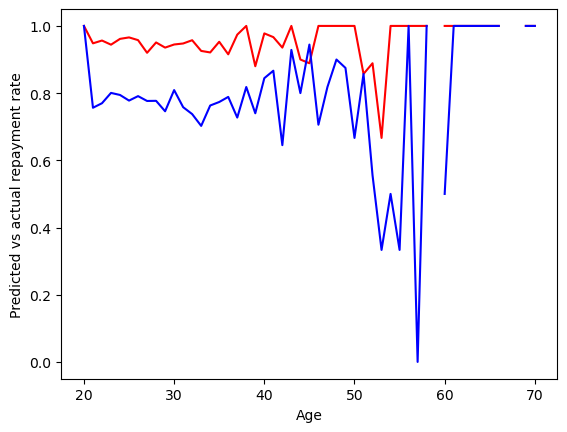

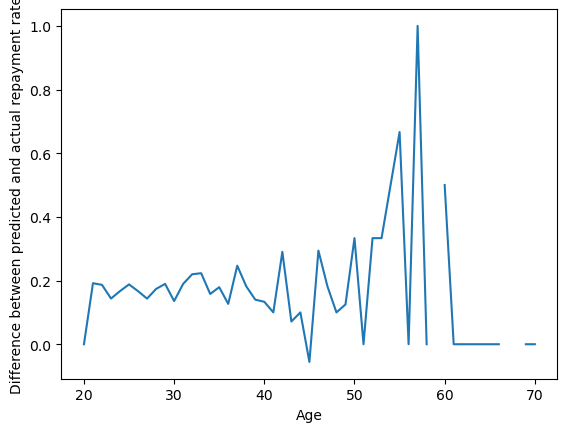

In [221]:
# Is it more difficult for people in certain age groups to access credit under your proposed system?
# calculate the percentage of approved loans for each age
approvedByAge = []
for i in range(18, 101):
    approvedByAge.append(X_test['decision_from_predicted'][X_test['person_age'] == i].sum()/len(X_test['decision_from_predicted'][X_test['person_age'] == i]))
actualByAge = []
# add Y_test to X_test
X_test['loan_status'] = abs(Y_test -1) 
for i in range(18, 101):
    actualByAge.append(X_test['loan_status'][X_test['person_age'] == i].sum()/len(X_test['loan_status'][X_test['person_age'] == i]))
plt.plot(range(18, 101), approvedByAge, color = 'red')
plt.plot(range(18, 101), actualByAge, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Predicted vs actual repayment rate')
plt.show()

# graph of difference between predicted and actual repayment rate by age
plt.plot(range(18, 101), np.array(approvedByAge) - np.array(actualByAge))
plt.xlabel('Age')
plt.ylabel('Difference between predicted and actual repayment rate')
plt.show()


It seems like younger people are expected to default more often, which is why they are rejected more often. There is also an interesting trend where older aged individuals are more likely to have loans accepted that will default. I wonder if this is because they are likely to die prior to full repayment of the loan. The implications of this are interesting, as it could be seen as a form of discrimination against both younger and older individuals, even if it is based on data. Overall though, the model does a decent job of not completely rejecting any age group, which is a good sign.

         Loan Intent  Predicted Repayment Rate  Actual Repayment Rate
0            VENTURE                  0.954988               0.765207
1          EDUCATION                  0.949564               0.804074
2            MEDICAL                  0.947368               0.767368
3    HOMEIMPROVEMENT                  0.947080               0.753650
4           PERSONAL                  0.944764               0.757192
5  DEBTCONSOLIDATION                  0.955112               0.812968


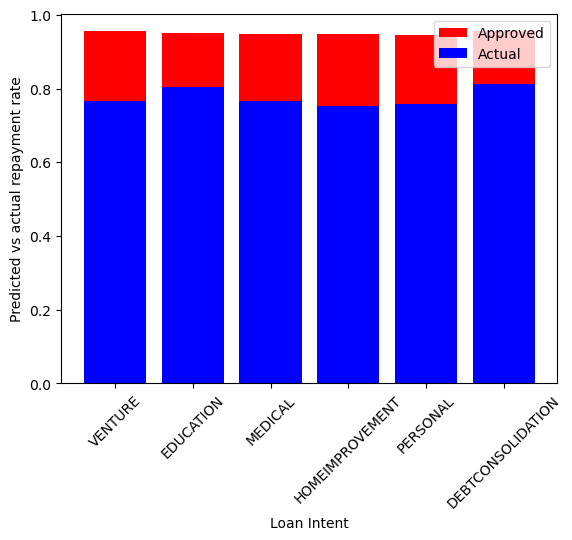

In [231]:
# Is it more difficult for people to get loans in order to pay for medical expenses? How does this compare with the actual rate of default in that group? What about people seeking loans for business ventures or education?

# calculate the percentage of approved loans for each loan intent
approvedByIntent = []
X_test['loan_intent'] = df_test['loan_intent']
for intent in X_test['loan_intent'].unique():
    approvedByIntent.append(X_test['decision_from_predicted'][X_test['loan_intent'] == intent].sum()/len(X_test['decision_from_predicted'][X_test['loan_intent'] == intent]))
actualByIntent = []
for intent in X_test['loan_intent'].unique():
    actualByIntent.append(X_test['loan_status'][X_test['loan_intent'] == intent].sum()/len(X_test['loan_status'][X_test['loan_intent'] == intent]))

# table of predicted vs actual repayment rate by loan intent

df = pd.DataFrame({'Loan Intent': X_test['loan_intent'].unique(), 'Predicted Repayment Rate': approvedByIntent, 'Actual Repayment Rate': actualByIntent})
print(df)

# graph of predicted vs actual repayment rate by loan intent

plt.bar(X_test['loan_intent'].unique(), approvedByIntent, color = 'red')
plt.bar(X_test['loan_intent'].unique(), actualByIntent, color = 'blue')
plt.xlabel('Loan Intent')
plt.xticks(rotation = 45)
plt.ylabel('Predicted vs actual repayment rate')
plt.legend(['Approved', 'Actual'])
plt.show()


It seems like the loans for all of the different purposes are accepted at similar rates, which is a good sign. However, the actual default rates for each group are a little different. For medical expenses, model predicts that more of the loans will be repayed than they actually are. This is a good sign, but medical loans are still the third most likely to be denied but only the 4th most likely to default. However, the difference in approval for each group is not too large. Despite this, medical debt is undoubtedly a horrible burden upon those who are already suffering, and it is important to consider the additional human cost of denying these loans.

   Income Bin  Predicted Repayment Rate  Actual Repayment Rate
0           0                  0.884692               0.516899
1           1                  0.874751               0.604374
2           2                  0.911439               0.789668
3           3                  0.937093               0.728850
4           4                  0.964215               0.807157
5           5                  0.966135               0.824701
6           6                  0.984344               0.835616
7           7                  0.979920               0.877510
8           8                  0.997984               0.893145
9           9                  1.000000               0.904573


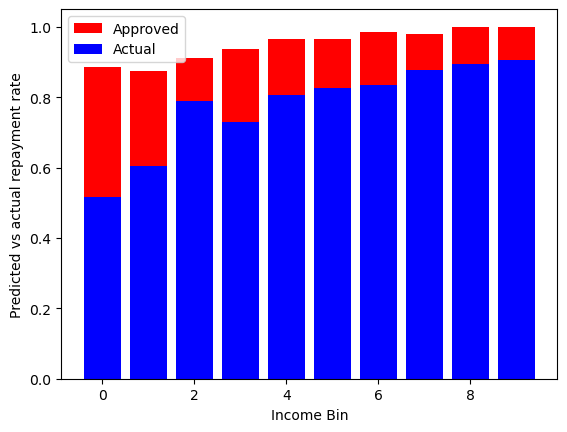

In [233]:
# How does a person’s income level impact the ease with which they can access credit under your decision system?

# divide income into 10 bins
X_test['income_bin'] = pd.qcut(X_test['person_income'], 10, labels = False)

# calculate the percentage of approved loans for each income bin
approvedByIncome = []
for i in range(10):
    approvedByIncome.append(X_test['decision_from_predicted'][X_test['income_bin'] == i].sum()/len(X_test['decision_from_predicted'][X_test['income_bin'] == i]))
actualByIncome = []
for i in range(10):
    actualByIncome.append(X_test['loan_status'][X_test['income_bin'] == i].sum()/len(X_test['loan_status'][X_test['income_bin'] == i]))

# table of predicted vs actual repayment rate by income bin

df = pd.DataFrame({'Income Bin': range(10), 'Predicted Repayment Rate': approvedByIncome, 'Actual Repayment Rate': actualByIncome})
print(df)

# graph of predicted vs actual repayment rate by income bin

plt.bar(range(10), approvedByIncome, color = 'red')
plt.bar(range(10), actualByIncome, color = 'blue')
plt.xlabel('Income Bin')
plt.ylabel('Predicted vs actual repayment rate')
plt.legend(['Approved', 'Actual'])
plt.show()

I am so proud of my model. It does a very good job of not discriminating based on income level, with lower level incomes actually having a larger disparity between accepted and defaulted loans than higher income levels. Interestingly, the model predicts that the different income levels have a somewhat similar default rate, while the actual default rate is much higher for lower income levels. This is bad from a money perspective, but good from a moral perspective, as it shows that the model is not discriminating based on income level. Additionally, while one could argue that money is being lost to the poorer individuals, this is still maximizing profit with the current threshold. So, I suppose it could be seen as profitable to be charitable, at least in this case.

### Reflection

I was surprised by the level of relative fairness achieved by my model. It was able to maximize profit while not obviously discriminating based on age or income level. It is at least subtle, which is more than I can say for most people. I learned that thresholds are important in decision making, and that they can be used to determine the 'optimal' decision beyond predicting labels. I also learned that it is important to consider the ethical implications of decision making, and that profit is not the only consideration when making decisions.

In terms of further ethical considerations, medical expenses have high default rates. This may be due to the nature that those in medical debt may not recover, and thus may not be able to repay the loan. It bring us to the question of whether it is fair to make these loans more difficult to obtain. While I feel my model was relatively successful in not discriminating against those seeking medical loans, it is still important to consider the human cost of denying a single one of these loans. Even cosmetic surgeries can be life changing for some! In the end, we must decide what is fair.

Fairness is a two part decision here, as we must decide what is means to be fair as well as apply that definition to this particular instance. I believe that fair decision making means not making decisions on things which cannot be determined by the individual. Even though we live in a "pull yourself up by your bootstraps" society, most individuals are a product of their environments, and some boots don't even have straps anymore! Further, many things are impacted by a combination of effort and luck. However, if we can determine what it means to have something be outside of an individual's control, we can make reasonably fair decisions.

We must also consider the business cost of accepting medical loans. While humans are not numbers, the individuals who make up a business are. While profits in the current setting generally go straight to the top and most certainly do not drop in the fashion of trickle down economics, in a world where they did we would have to consider the cost of accepting these loans on those who give them out. On the flip side, an individual who is able to pay off a medical loan is likely to be a loyal customer in the future.

In conclusion, it is not fair for medical expenses to have higher rates of default than other loans, especially when old age, which also has a high rate of default via death, is not discriminated against. The *most* fair decision would be to de-profitize the medical industry, but that is a discussion for another day.